# Principal Component Analysis on Iris dataset

In [4]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

In [5]:
#Imoprt data from the library
iris = load_iris()

In [6]:
# Separate the features and the target
x = iris.data
target = iris.target
target_names = iris.target_names
print("Size of feature: ",x.shape)
print("Size of target: ",target.shape)

Size of feature:  (150, 4)
Size of target:  (150,)


In [7]:
#Normalize the feature
x_normal = x - np.mean(x, axis=0)

In [8]:
#Calculate the Covariance matrix
Sx = (1/(len(x_normal)-1))*np.dot(x_normal.T,x_normal)
print("Size of covariance matrix: ",Sx.shape)

Size of covariance matrix:  (4, 4)


In [9]:
#Calculate eigenvalues & eigenvectors
eigenvalues, eigenvector = np.linalg.eig(Sx)

In [10]:
#Sort the eigenvalues and corresponding eigenvector

#Find the indices in descending order
indices = np.argsort(eigenvalues)[::-1] 

# Sort using the indices
sorted_eigenvalues = eigenvalues[indices]
sorted_eigenvector = eigenvector[:, indices]

In [11]:
np.set_printoptions(suppress=True, precision=4)
print("Eigenvalues\n", np.reshape(sorted_eigenvalues,(len(eigenvalues),1)))

Eigenvalues
 [[4.2282]
 [0.2427]
 [0.0782]
 [0.0238]]


In [12]:
#Variance of eigenvalues
total_var = np.sum(sorted_eigenvalues)
var_prop = (sorted_eigenvalues / total_var) * 100

print("Variance proportion\n",np.reshape(var_prop,(len(var_prop),1)))
print("\nTotal variance: ",np.sum(var_prop))

Variance proportion
 [[92.4619]
 [ 5.3066]
 [ 1.7103]
 [ 0.5212]]

Total variance:  99.99999999999999


In [13]:
#Compute output
y = np.dot(sorted_eigenvector.T,x_normal.T).T
print("Size of output: ",y.shape)

Size of output:  (150, 4)


In [14]:
#Covaraince matrix of output
Sy = (1/(len(y)-1))*np.dot(y.T,y)

np.set_printoptions(suppress=False, precision=4)
print("Size of covariance matrix: ",Sy.shape)
print("\nCovaraince matrix\n",Sy)

Size of covariance matrix:  (4, 4)

Covaraince matrix
 [[ 4.2282e+00 -1.3114e-15 -1.6452e-15  5.0146e-16]
 [-1.3114e-15  2.4267e-01 -2.2950e-16  4.1838e-16]
 [-1.6452e-15 -2.2950e-16  7.8210e-02  2.2577e-16]
 [ 5.0146e-16  4.1838e-16  2.2577e-16  2.3835e-02]]


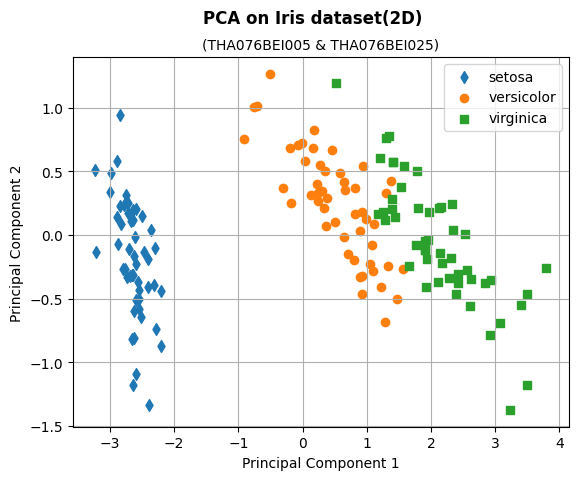

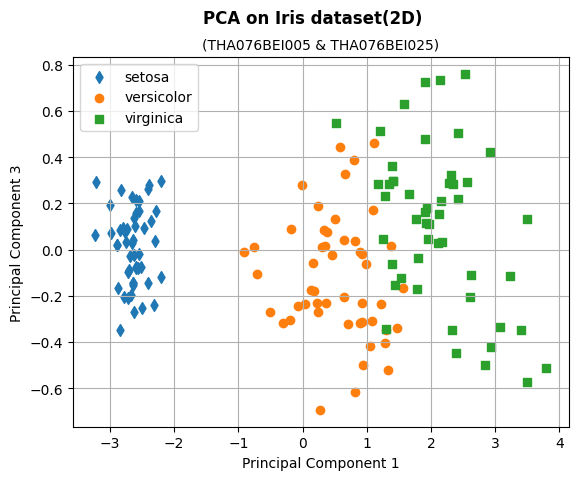

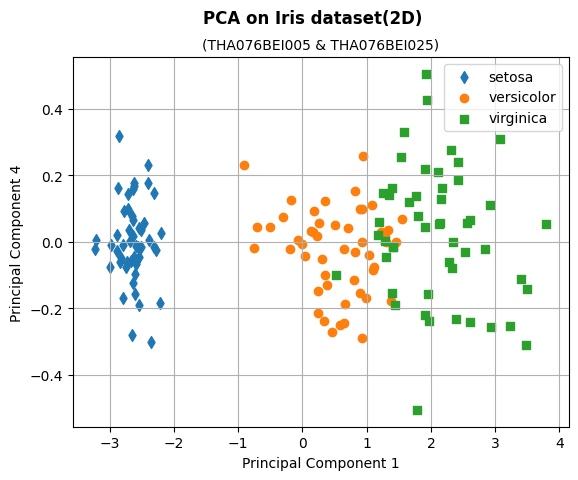

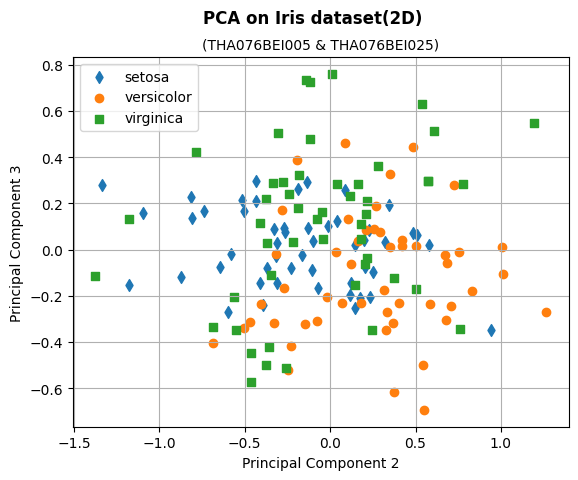

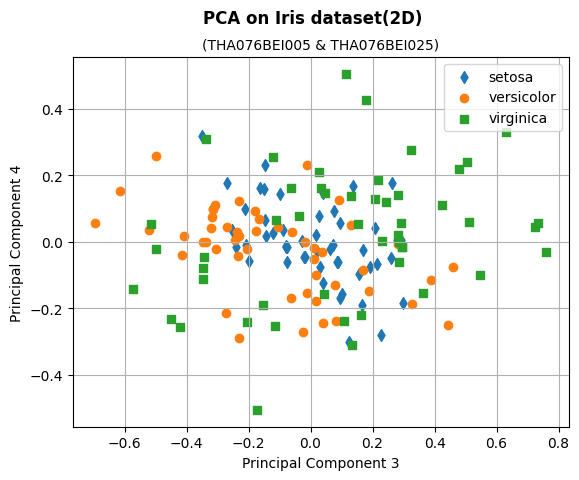

In [15]:
# Define the combination for 2D plot
combination_2d = [(0, 1), (0, 2), (0, 3), (1,2), (2, 3)]
marker_style = ['d', 'o', 's']

#Loop through the combiantion for scatter plot
for i, (pc1, pc2) in enumerate(combination_2d):
    plt.figure()
    
    for a in np.unique(target):
        plt.scatter(y[target == a, pc1], y[target == a, pc2], label=target_names[a], marker=marker_style[a])

    plt.suptitle('PCA on Iris dataset(2D)', fontsize=12, fontweight='bold')
    plt.title("(THA076BEI005 & THA076BEI025)", fontsize=10)
    plt.xlabel(f'Principal Component {pc1+1}')
    plt.ylabel(f'Principal Component {pc2+1}')
    plt.grid(True)
    plt.legend()
    plt.show()

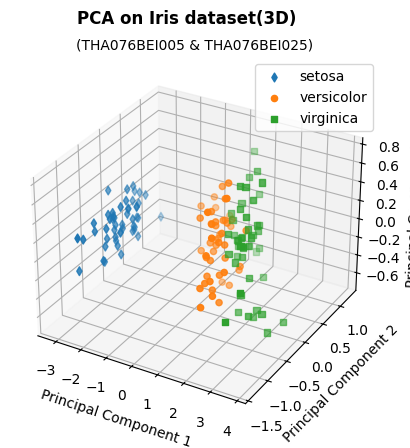

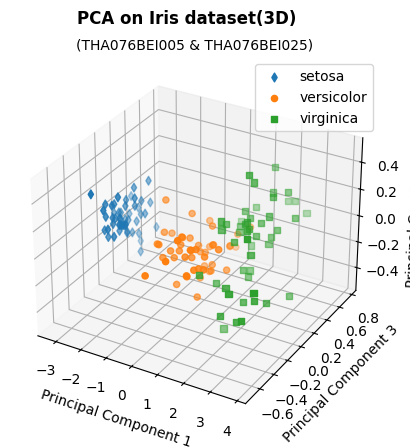

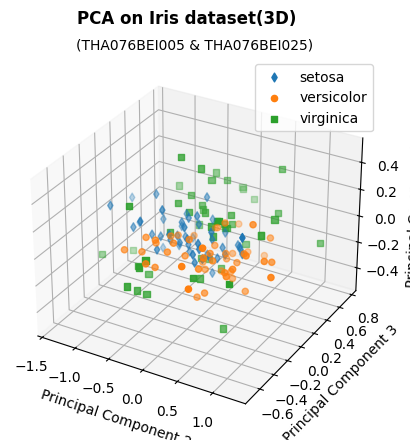

In [16]:
# Define the combination for 3Dplot
combination_3d = [(0, 1, 2), (0, 2, 3), (1, 2, 3)]

#Loop through the combiantion for scatter plot
for i, (pc1, pc2, pc3) in enumerate(combination_3d):
    ax = plt.axes(projection='3d')

    for a in np.unique(target):
        ax.scatter(y[target == a, pc1], y[target == a, pc2], y[target == a, pc3], label=target_names[a], marker=marker_style[a])

    plt.suptitle('PCA on Iris dataset(3D)', fontsize=12, fontweight='bold')
    ax.set_title("(THA076BEI005 & THA076BEI025)", fontsize=10)
    ax.set_xlabel(f'Principal Component {pc1+1}')
    ax.set_ylabel(f'Principal Component {pc2+1}')
    ax.set_zlabel(f'Principal Component {pc3+1}')
    ax.legend()
    plt.show()